In [11]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
# read csv
df = pd.read_csv("../Auto.csv")
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [3]:
# check the data types of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
# horsepower is filled with numbers so coerce the column back to floats and recheck the data types
df["horsepower"] = pd.to_numeric(df.horsepower, errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [5]:
# drop the entire rows with nan value in horspower
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [6]:
# change names to quantitative from car names (qualitative)
df["name"] = pd.factorize(df.name)[0]
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,2


In [7]:
# assign the variables for regressions
X = df["horsepower"]
y = df["mpg"]

In [8]:
# add the constant term
X = sm.add_constant(X)

In [9]:
# regress and fit the model
model = sm.OLS(y, X).fit()

In [10]:
# print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           7.03e-81
Time:                        21:15:33   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
predictions = model.predict(X)

In [15]:
rse = np.sqrt(mean_squared_error(predictions, y))
mean = df["mpg"].mean()
pe = np.sqrt(mean_squared_error(predictions, y))/df["mpg"].mean()
print(rse)
print(mean)
print(pe)

4.893226230065713
23.445918367346938
0.20870268988398827


In [16]:
# predict value at horsepower at 98
# mean is the predicted value
# mean_ci are 95% confidence intervals
# obs_ci are 95% prediction intervals (usually a wider range than confidence intervals)
x_test = np.array([1, 98])
model.get_prediction(x_test).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


In [ ]:
# ai. There is a relationship between predictor and response as p-value is very low and the F-statistic rejects the null statistics
# aii. The percentage error is 20.87% with rse 4.89 of and mean of 23.45 divided. The predictor (horsepower) also explains 60.5% of the variance in mpg
# aiii. The relationship is negative based on the coefficient. Increase in horsepower reduces the miles per gallon
# aiv. Prediction is 24.47. Confidence and prediction intervals are above

# c. The relationship is not really linear, but the LSR tries its best to fit the model

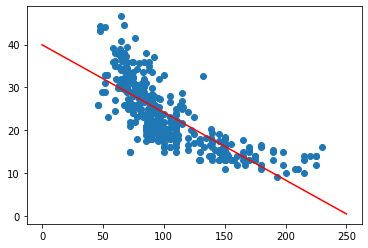

In [18]:
import matplotlib.pyplot as plt

x = df.horsepower
beta0, beta1 = model.params

new_x = np.array([0, 250])
new_y = beta0 + (beta1 * new_x)

plt.scatter(x, y)
plt.plot(new_x, new_y, color="red")
plt.show()